In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net3
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net3().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           1,152
              ReLU-4           [-1, 16, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             128
         MaxPool2d-6            [-1, 8, 14, 14]               0
            Conv2d-7            [-1, 8, 12, 12]             576
              ReLU-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 16, 10, 10]           1,152
             ReLU-10           [-1, 16, 10, 10]               0
           Conv2d-11            [-1, 8, 10, 10]             128
        MaxPool2d-12              [-1, 8, 5, 5]               0
           Conv2d-13              [-1, 8, 3, 3]             576
             ReLU-14              [-1, 

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=2.3020 Batch_id=468 Accuracy=10.49: 100%|██████████| 469/469 [00:19<00:00, 23.56it/s]


Test set: Average loss: 2.3022, Accuracy: 1112/10000 (11.12%)

Epoch 2


Train: Loss=0.4915 Batch_id=468 Accuracy=25.71: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]


Test set: Average loss: 0.4859, Accuracy: 8476/10000 (84.76%)

Epoch 3


Train: Loss=0.3205 Batch_id=468 Accuracy=91.70: 100%|██████████| 469/469 [00:18<00:00, 25.66it/s]


Test set: Average loss: 0.1478, Accuracy: 9564/10000 (95.64%)

Epoch 4


Train: Loss=0.1577 Batch_id=468 Accuracy=95.75: 100%|██████████| 469/469 [00:19<00:00, 24.02it/s]


Test set: Average loss: 0.1004, Accuracy: 9687/10000 (96.87%)

Epoch 5


Train: Loss=0.0224 Batch_id=468 Accuracy=96.82: 100%|██████████| 469/469 [00:19<00:00, 24.13it/s]


Test set: Average loss: 0.0698, Accuracy: 9764/10000 (97.64%)

Epoch 6


Train: Loss=0.0783 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s]


Test set: Average loss: 0.0648, Accuracy: 9790/10000 (97.90%)

Epoch 7


Train: Loss=0.0539 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:18<00:00, 25.33it/s]


Test set: Average loss: 0.0625, Accuracy: 9800/10000 (98.00%)

Epoch 8


Train: Loss=0.1072 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:19<00:00, 23.88it/s]


Test set: Average loss: 0.0654, Accuracy: 9771/10000 (97.71%)

Epoch 9


Train: Loss=0.0804 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:19<00:00, 24.24it/s]


Test set: Average loss: 0.0607, Accuracy: 9814/10000 (98.14%)

Epoch 10


Train: Loss=0.0542 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:18<00:00, 25.82it/s]


Test set: Average loss: 0.0537, Accuracy: 9815/10000 (98.15%)

Epoch 11


Train: Loss=0.0592 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:19<00:00, 24.63it/s]


Test set: Average loss: 0.0573, Accuracy: 9815/10000 (98.15%)

Epoch 12


Train: Loss=0.0434 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:19<00:00, 23.92it/s]


Test set: Average loss: 0.0420, Accuracy: 9851/10000 (98.51%)

Epoch 13


Train: Loss=0.0456 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:19<00:00, 24.01it/s]


Test set: Average loss: 0.0464, Accuracy: 9840/10000 (98.40%)

Epoch 14


Train: Loss=0.0304 Batch_id=468 Accuracy=98.65: 100%|██████████| 469/469 [00:18<00:00, 24.84it/s]


Test set: Average loss: 0.0392, Accuracy: 9866/10000 (98.66%)

Epoch 15


Train: Loss=0.0047 Batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:19<00:00, 24.13it/s]


Test set: Average loss: 0.0416, Accuracy: 9860/10000 (98.60%)



Text(0.5, 1.0, 'Test Accuracy')

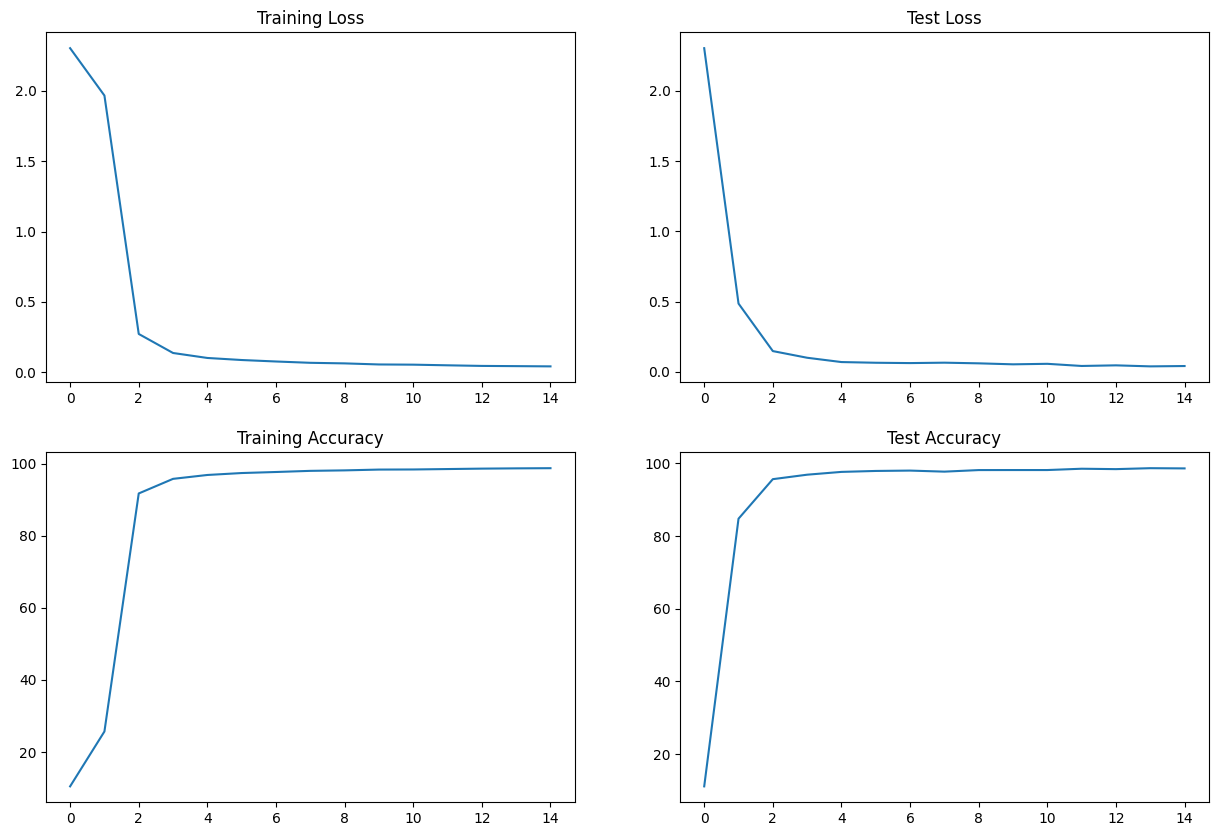

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  98.70166666666667
best test accuracy :  98.66
